In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading Movielens rating dataset of size 100k

In [1]:
DATASET_LINK = 'http://files.grouplens.org/datasets/movielens/ml-100k.zip'

In [9]:
!wget -nc http://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip -n ml-100k.zip

--2025-06-12 04:13:08--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 64:ff9b::8065:4198, 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|64:ff9b::8065:4198|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  1.88MB/s    in 2.5s    

2025-06-12 04:13:11 (1.88 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]

Archive:  ml-100k.zip


In [5]:
full_details = pd.read_csv("ml-100k/u.info", header = None) # u info contains : number of users, items, ratings.

In [8]:
print("Deatils of the users, items and ratings in the dataset:" ,list(full_details[0]))

Deatils of the users, items and ratings in the dataset: ['943 users', '1682 items', '100000 ratings']


u data is the full dataset displayed above

In [10]:
# Renaming 
col_names = ['user id' , 'movie id', 'rating', 'timestamp']
dataset = pd.read_csv("ml-100k/u.data", sep = '\t', header = None , names = col_names)

In [12]:
dataset.head(10)

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [14]:
print("Length of dataset: " , len(dataset))
max(dataset['movie id']), min(dataset['movie id'])

Length of dataset:  100000


(1682, 1)

u.item : info about the movies , it is a tab seperated list of <br>
          movie id | movie title | release date | video release date |
          IMDb URL | unknown | Action | Adventure | Animation |
          Children's | Comedy | Crime | Documentary | Drama | Fantasy |
          Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |
          Thriller | War | Western |

In [24]:
d = """movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children's | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western """
col_names2 = [col.strip() for col in d.split('|')]
col_names2

['movie id',
 'movie title',
 'release date',
 'video release date',
 'IMDb URL',
 'unknown',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [25]:
items_dataset = pd.read_csv("ml-100k/u.item", sep = '|', header = None, names = col_names2, encoding = 'latin-1')
items_dataset

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
movie_dataset = items_dataset[['movie id', 'movie title']]
movie_dataset.head()

,movie id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


### Merging required Datasets

In [27]:
merged_dataset = pd.merge(dataset, movie_dataset, how = 'inner', on = 'movie id')
merged_dataset.head()

,user id,movie id,rating,timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


In [29]:
merged_dataset.describe() #This shows that the dataset has no missing values.

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


## Data Visualization

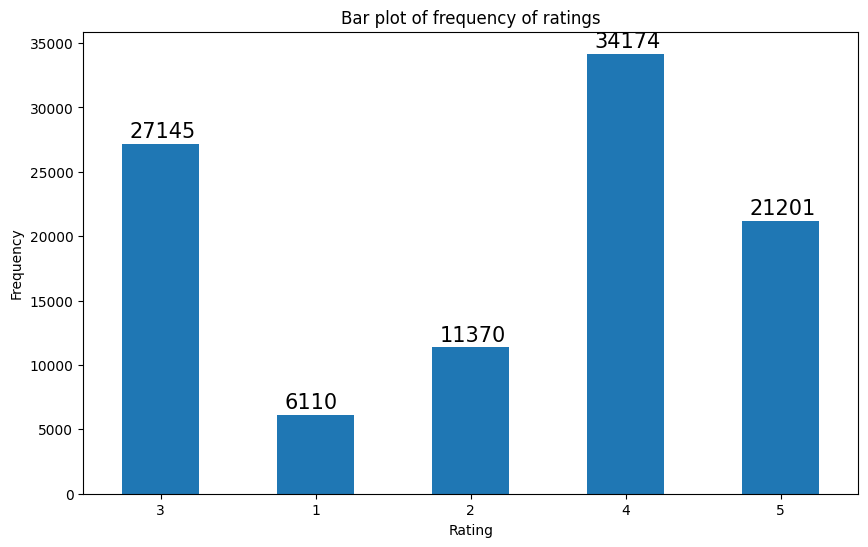

In [32]:
merged_dataset['rating'].value_counts(sort = False).plot(kind = 'bar', figsize = (10, 6), use_index=True, rot = 0)
plt.title("Bar plot of frequency of ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")

label = list(merged_dataset['rating'].value_counts(sort = False))
r4 = [1,2,3,4,5]
for i in range(len(label)):
    plt.text(x = r4[i] -1.2 , y = label[i] + 500,s = label[i],size = 15)

In [34]:
avg_highly_rated_movies = merged_dataset.groupby(['movie title']).agg({"rating":"mean"})['rating'].sort_values(ascending=False)
avg_highly_rated_movies = avg_highly_rated_movies.to_frame()

In [35]:
avg_highly_rated_movies.head(10)

,rating
movie title,
Aiqing wansui (1994),5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0
Entertaining Angels: The Dorothy Day Story (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Prefontaine (1997),5.0
"Great Day in Harlem, A (1994)",5.0
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
